In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/upi id.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(144548, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,144548.0,9.209916e+00,1.867222e+00,1.00,9.0000,9.00,10.000,11.00
amount,144548.0,1.790406e+05,3.418095e+05,0.32,10986.3725,60667.72,222192.155,10000000.00
oldbalanceOrg,144548.0,8.925217e+05,2.817049e+06,0.00,0.0000,20040.00,198245.000,38939424.03
newbalanceOrig,144548.0,9.087128e+05,2.853884e+06,0.00,0.0000,0.00,226753.570,38946233.02
oldbalanceDest,144547.0,9.115971e+05,2.389232e+06,0.00,0.0000,31553.00,678506.235,34905522.40
newbalanceDest,144547.0,1.184003e+06,2.719764e+06,0.00,0.0000,89676.95,1122469.380,38946233.02
isFraud,144547.0,8.786070e-04,2.962838e-02,0.00,0.0000,0.00,0.000,1.00
isFlaggedFraud,144547.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.00,0.000,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144548 entries, 0 to 144547
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            144548 non-null  int64  
 1   type            144548 non-null  object 
 2   amount          144548 non-null  float64
 3   nameOrig        144548 non-null  object 
 4   oldbalanceOrg   144548 non-null  float64
 5   newbalanceOrig  144548 non-null  float64
 6   nameDest        144548 non-null  object 
 7   oldbalanceDest  144547 non-null  float64
 8   newbalanceDest  144547 non-null  float64
 9   isFraud         144547 non-null  float64
 10  isFlaggedFraud  144547 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.1+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [ ]:
df = df[~df['isFraud'].isnull()]

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
all_Data = df.size
print(all_Data)

1590017


In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df['type'].value_counts()

,count
type,
PAYMENT,55193
CASH_OUT,46507
CASH_IN,29277
TRANSFER,12234
DEBIT,1336


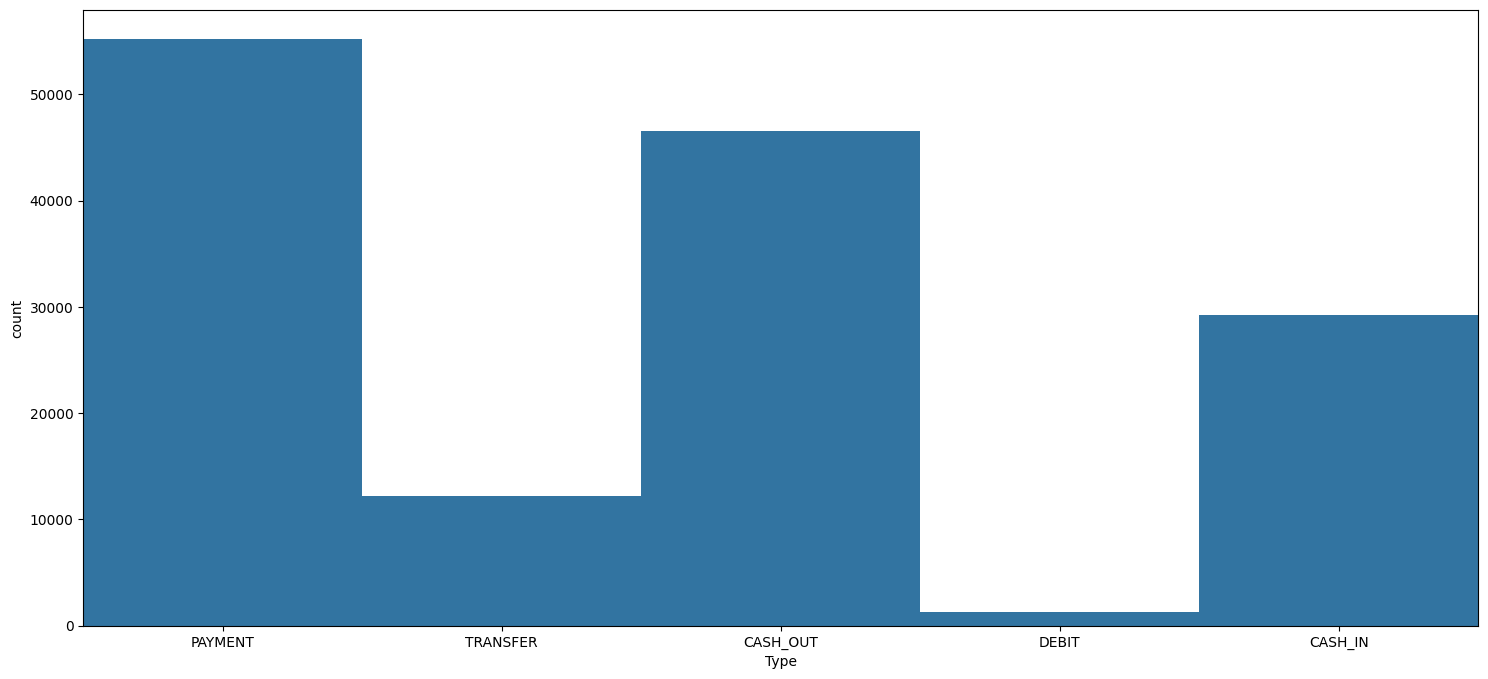

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(data=df, x="type", width= 1,linestyle='solid')
plt.xlabel('Type')
plt.show()

In [ ]:
df['type'].replace({'PAYMENT':0, 'CASH_IN':1, 'CASH_OUT':2, 'TRANSFER':3, 'DEBIT':4}, inplace=True)

In [ ]:
df['type'].value_counts()

,count
type,
0,55193
2,46507
1,29277
3,12234
4,1336


In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
df.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.00,160296.36,0.0,0.00,0.0,0.0
1,1,0,1864.28,21249.00,19384.72,0.0,0.00,0.0,0.0
2,1,3,181.00,181.00,0.00,0.0,0.00,1.0,0.0
3,1,2,181.00,181.00,0.00,21182.0,0.00,1.0,0.0
4,1,0,11668.14,41554.00,29885.86,0.0,0.00,0.0,0.0
5,1,0,7817.71,53860.00,46042.29,0.0,0.00,0.0,0.0
6,1,0,7107.77,183195.00,176087.23,0.0,0.00,0.0,0.0
7,1,0,7861.64,176087.23,168225.59,0.0,0.00,0.0,0.0
8,1,0,4024.36,2671.00,0.00,0.0,0.00,0.0,0.0
9,1,4,5337.77,41720.00,36382.23,41898.0,40348.79,0.0,0.0


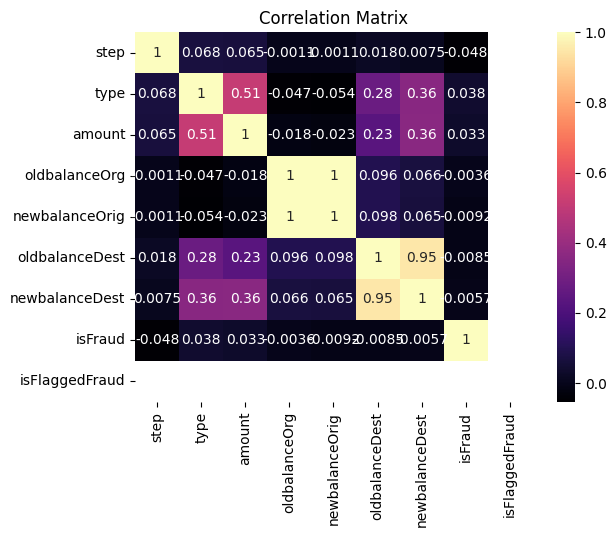

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop(['isFraud'], axis=1)
print(X.shape)

y = df['isFraud']
print(y.shape)

(144547, 8)
(144547,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

categorical_features = ['type']
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,f1_score

model = DecisionTreeClassifier(criterion='entropy',max_depth='10', min_samples_split='5')

param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("The best paramerter:", grid_search.best_params_)
print("Best_score:", grid_search.best_score_)
y_pred = grid_search.predict(X_test)

The best paramerter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best_score: 0.9991698164872691


In [ ]:
def evaluate_model(x_test, y_test, grid_search_model): #added grid_search_model parameter
   # Use the trained model from grid search
   y_pred=grid_search_model.predict(x_test)
   accuracy=accuracy_score(y_test,y_pred)
   precision=precision_score(y_test,y_pred)
   f1=f1_score(y_test,y_pred)
   return {"accuracy":accuracy,"precision":precision,"f1score":f1}
# Run the evaluation.
result=evaluate_model(X_test,y_test, grid_search) # Pass the trained model.
print(result)

{'accuracy': 0.9991006572120373, 'precision': 0.4666666666666667, 'f1score': 0.35}
{'accuracy': 0.9991006572120373, 'precision': 0.4666666666666667, 'f1score': 0.35}
